1. Perceptron Trick have this
- Misclassified points "pull" the decision boundary by necessitating adjustments to correct classification errors.
- Misclassified points closer to the  decision boundary pull the line with low magnitude and points far to the  decision boundary pull the line with high magnitude

2. We are adding this to the Perceptron Trick 
- Correctly classified points indirectly contribute by creating a gap between classes, which effectively "pushes" the decision boundary away from them.
- Classified points closer to the  decision boundary push the line with high magnitude and points far to the  decision boundary pull the line with low magnitude

Perceptron Trick Equation

`w_n = w_0 + α(y_i - y_hat)x_i`

The Perceptron algorithm update rule you've provided is indeed a simplified version of the weight update equation, commonly known as the Perceptron trick. Here's a breakdown of the components:

- w_n represents the updated weight vector after processing a training example.
- w_0 is the current weight vector.
- α is learning rate
- y_i is the true label of the training example x_i.
- y_hat is the predicted label of the training example x_i using the current weight vector w_0.
- x_i is the feature vector of the training example.

This update rule is used to adjust the weights w of the perceptron based on the misclassification of an example. If the predicted label y_hat is not equal to the true label y_i, the weights are adjusted to bring the decision boundary closer to the correct classification for that particular example.

The adjustment is proportional to the feature vector x_i scaled by the difference between the true label and the predicted label (y_i - y_hat), which determines the direction of the adjustment. If y_i and y_hat match, the weights remain unchanged.

This update rule is typically applied iteratively to each training example until convergence, where the algorithm correctly classifies all examples or reaches a predefined stopping criterion.

**To change the behaviour of Perceptron we will use Sigmoid Function**

![](https://miro.medium.com/v2/resize:fit:1200/1*a04iKNbchayCAJ7-0QlesA.png)

The sigmoid function is a mathematical function that's often used in machine learning, particularly in artificial neural networks. It's called "sigmoid" because its shape resembles the letter "S". 

In simple terms, the sigmoid function takes any input value and maps it to a value between 0 and 1. This makes it useful for problems where we want to predict probabilities or classify things into two categories, like "yes" or "no".

The formula for the sigmoid function is:

`f(x) = 1 / 1 + e^-x`

- Here, `e` is the base of the natural logarithm (approximately equal to `2.71828`), and `x` is the input value.

- When `x` is a large positive number, `e^-x` becomes very close to 0, so `f(x)` approaches 1.

- When `x` is a large negative number, `e^-x` becomes very large, so `f(x)` approaches 0.

- When `x` is a 0, `e^-x` becomes 0.5, so `f(x)` approaches 0.5.

In between, the function smoothly transitions from 0 to 1, depending on the value of x.

In essence, the sigmoid function "squashes" any input value into a range between 0 and 1, which is useful for tasks like binary classification, where we want to assign a probability of belonging to one class or another.

So, earlier we use to calculate y_hat like this
`y_hat = w_1 x_1 + w_2 x_2 + w_0` and then send it to the step function where if output of this 

**`y_hat = w_1 x_1 + w_2 x_2 + w_0` >= 0 then output is `1`** and if **`y_hat = w_1 x_1 + w_2 x_2 + w_0` < 0 then output is `0`**

**Now, we will use the Sigmoid function rather then using Step function because we want `(y_i - y_hat)` in this formula `w_n = w_0 + α(y_i - y_hat)x_i` not equal to 0**

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [2]:
import matplotlib.pyplot as plt

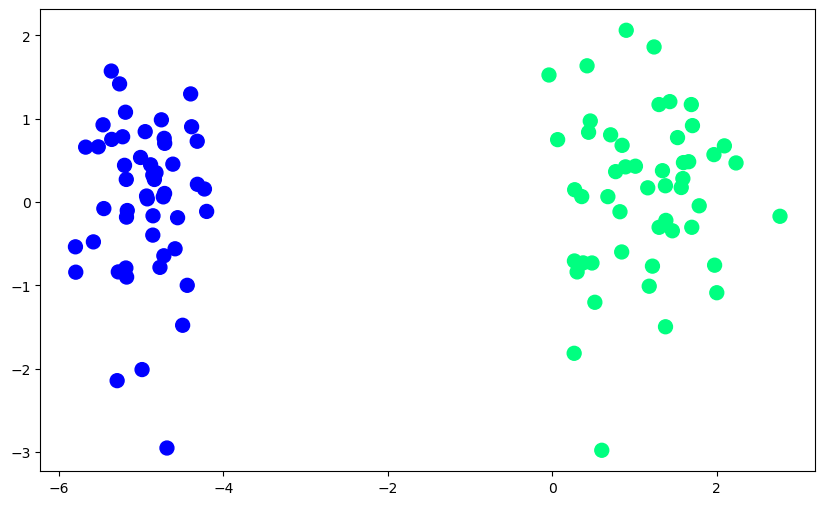

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [5]:
def step(z):
    return 1 if z>0 else 0

In [6]:
intercept_,coef_ = perceptron(X,y)

In [7]:
print(coef_)
print(intercept_)

[1.08682872 0.52024363]
1.2000000000000002


In [8]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [9]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

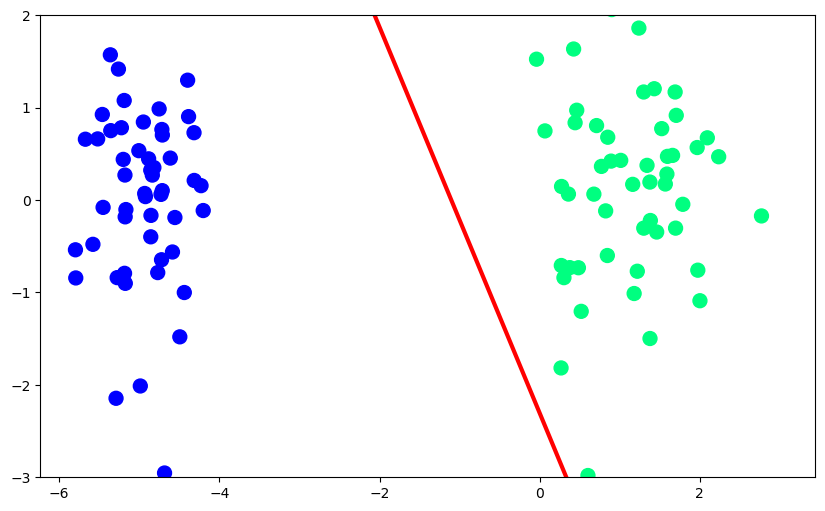

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [11]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [12]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [13]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

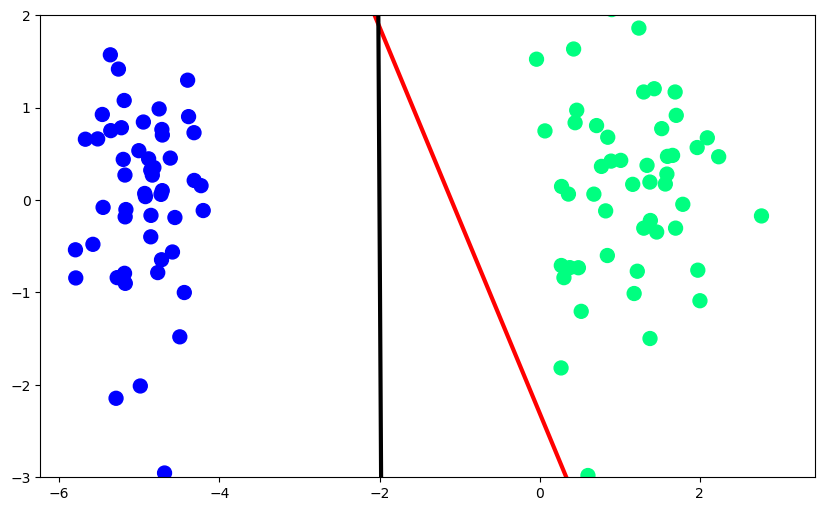

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [15]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [16]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [17]:
intercept_,coef_ = perceptron(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [18]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

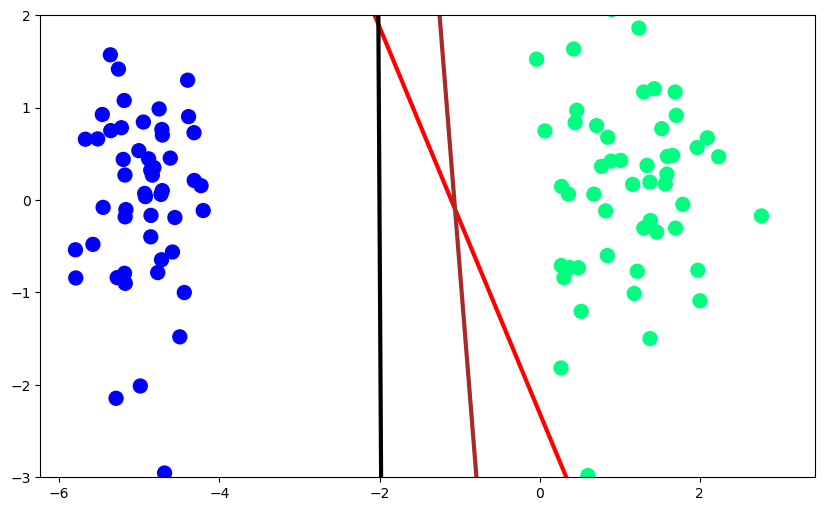

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)